# Faster Notes with Python
## Transcribing pdf slides with OCR and python


### A pipeline for taking notes

Usually when I take notes about a lecture, or video, it usually involves a set of pdf slides that I follow along with a video (or not), the process traditionally involves writing a few notes about what is being said and I often find myself copying some of the points made on the actualy pdf slide. Recently I have been experimenting with trying to automate this process by using python to automatically transcribe the pdf slides so that I can directly manipulate their content in a markdown file to avoid having to copy and paste or literally just copy what is in the pdf slide.

In this article I will show you how to automate the process of transcribing pdf slides to text using OCR.

---

### Why not use a traditional pdf to text tool?

The reason why I choose not to use traditional pdf to text tools is that I found that they give more issues then solve them. I tried using traditional python packages like `pdf2text` but they raise so many issues to quickly transcribe the notes that I decided to play around with a little bit of object detection and OCR. 

The neat thing about this approach is that once you get it right, it has a broad range of applications from digitizing handwritten notes to all sorts of image to text problems. 

---


### Steps
The steps to follow will be: 
1. Get the images
2. Detect the text in the images as bounding boxes
3. Feed each detected bounding box to a text recognizer
4. Showcase example outputs

I want to note here that in this particular case I mostly adapted code from this [repository](https://github.com/courao/ocr.pytorch) which I found to be as simple and to work as well as I needed.

Now, let's go through each one by one.

---


## 1. Get the images
To get the images I will use a pdf of introduction to Reinforcement Learning and write some code to get each slide as a png image.


In [15]:
from pdf2image import convert_from_path
from pdf2image.exceptions import (
 PDFInfoNotInstalledError,
 PDFPageCountError,
 PDFSyntaxError
)

pdf_path = "/home/lucassoares/Desktop/Notes/intro_RL_Lecture1.pdf"
images = convert_from_path(pdf_path)
for i, image in enumerate(images):
    fname = "slide" + str(i) + ".png"
    image.save(fname, "PNG")

Now that I have all of the images:

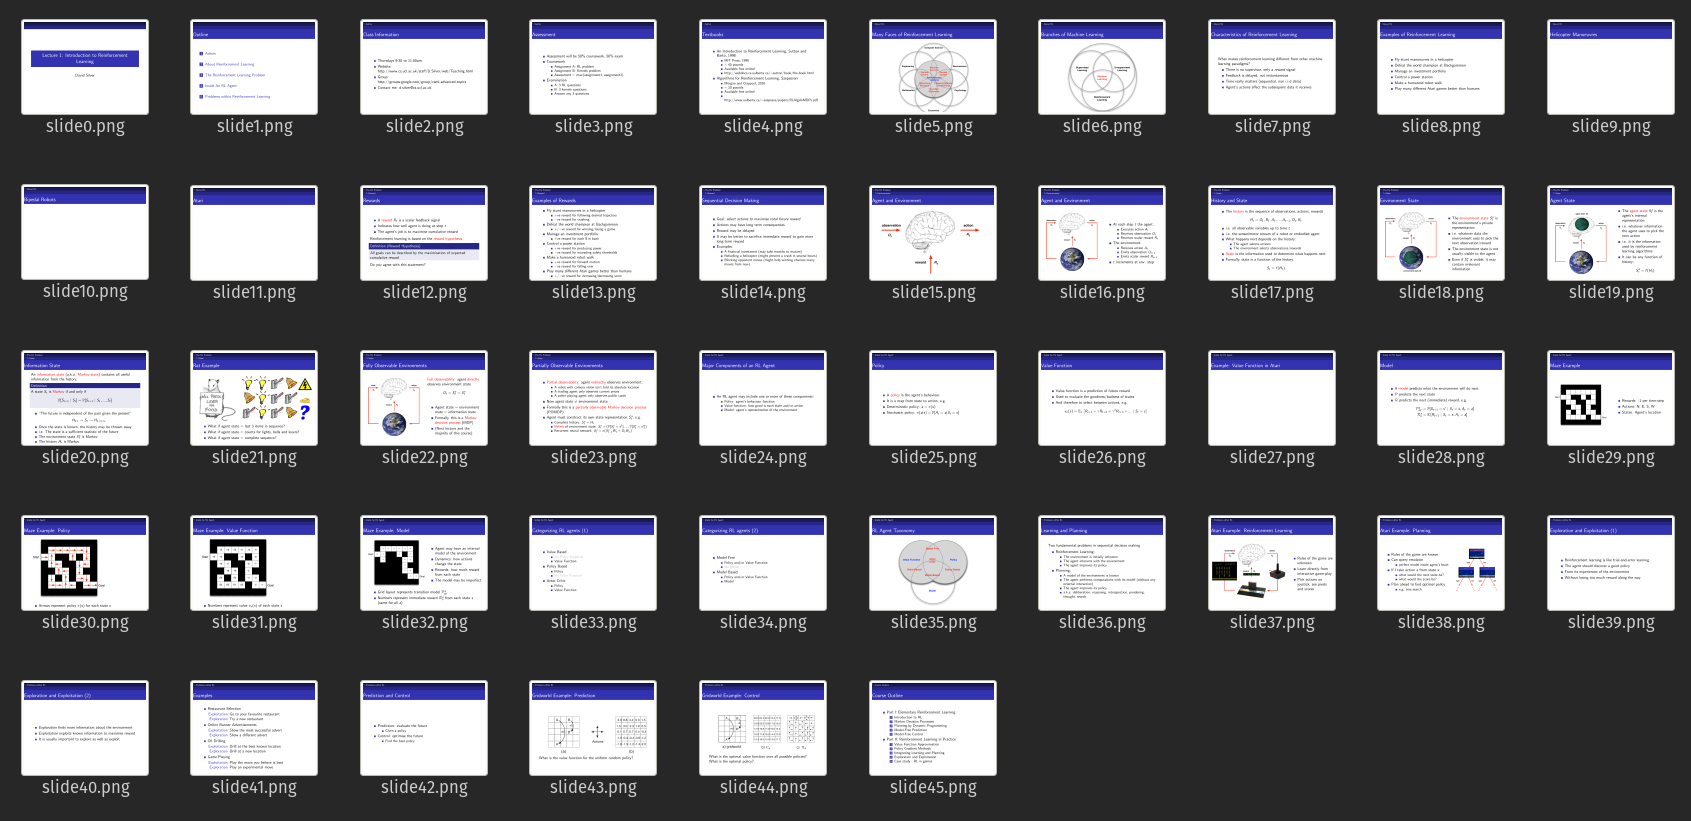


Let's run text detection on each.

## 2. Detect the text in the images as bounding boxes &

## 3. Feed each detected bounding box to a text recognizer


To do that we will use the text detector from the [ocr.pytorch repository](https://github.com/courao/ocr.pytorch).


In [11]:
# adapted from this source: https://github.com/courao/ocr.pytorch
%load_ext autoreload
%autoreload 2
import os
from ocr import ocr
import time
import shutil
import numpy as np
import pathlib
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pytesseract


def single_pic_proc(image_file):
    image = np.array(Image.open(image_file).convert('RGB'))
    result, image_framed = ocr(image)
    return result,image_framed

image_files = glob('./input_images/*.*')
result_dir = './output_images_with_boxes/'

# If the output folder exists we will remove it and redo it.
if os.path.exists(result_dir):
    shutil.rmtree(result_dir)
os.mkdir(result_dir)

for image_file in sorted(image_files):
    t = time.time()
    result, image_framed = single_pic_proc(image_file) # detecting and recognizing the text
    filename = pathlib.Path(image_file).name
    output_file = os.path.join(result_dir, image_file.split('/')[-1])
    txt_file = os.path.join(result_dir, image_file.split('/')[-1].split('.')[0]+'.txt')
    print(txt_file)
    txt_f = open(txt_file, 'w')
    Image.fromarray(image_framed).save(output_file)
    print("Mission complete, it took {:.3f}s".format(time.time() - t))
    print("\nRecognition Result:\n")
    for key in result:
        print(result[key][1])
        txt_f.write(result[key][1]+'\n')
    txt_f.close()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
./output_images_with_boxes/image0.txt
Mission complete, it took 0.238s

Recognition Result:

ecture
IntroductiontoReinforcement
Learning
DavidSilver
./output_images_with_boxes/image1.txt
Mission complete, it took 0.274s

Recognition Result:

Outline
Admin
About Reinforcement Learning
TheReinforcementLearning Problem→
Inside An RL Agent
Problems withinReinforcement Learning
./output_images_with_boxes/image10.txt
Mission complete, it took 0.168s

Recognition Result:

-AboutRL
Bipedal Robots
./output_images_with_boxes/image11.txt
Mission complete, it took 0.168s

Recognition Result:

-AboutRL
Atari
./output_images_with_boxes/image12.txt
Mission complete, it took 0.487s

Recognition Result:

-TheRL Problem
—Reward
Rewards
reward R. is a scalar feedback signal
Indicates how well agent is doing at step
Theagentsjiobistomaximisecumuativereward
Reinforcement learning is based on thereward hypothesis
Definit

./output_images_with_boxes/image32.txt
Mission complete, it took 0.620s

Recognition Result:

Introdu
-Inside An RL Agent
Maze Example:Model
Agent may have an internal
modeloftheenvironment
Start
Dvnamics: how actions
changethe state
Rewards:howmuchreward
fromeach state
Goal
Themodelmaybeimperfect
Grid layoutrepresents transition model P,
Numbers represent immediate rewardR from each state
(samefor alla)
./output_images_with_boxes/image33.txt
Mission complete, it took 0.474s

Recognition Result:

Introdu
—nside An RL Agent
Categorizing RL agents(1)
value Based
NoPolicv(Imolicit)
ValueFunction
Policy Based
Policy
ValueFunction
Actor Critic
Policy
valueFunction
./output_images_with_boxes/image34.txt
Mission complete, it took 0.289s

Recognition Result:

Introdu
—nside An RL Agent
Categorizing RL agents(2)
Model Free
Policy and/orvalue Function
Mod
ModelBased
Policy and/orvalueFunction
Model
./output_images_with_boxes/image35.txt
Mission complete, it took 0.355s

Recognition Result:

Intr

## 4. Showcase example outputs


In [13]:
import cv2 as cv

output_dir = pathlib.Path("/home/lucassoares/Desktop/projects/mediumPosts/ocr_productivity/output_images_with_boxes")

# image = cv.imread(str(np.random.choice(list(output_dir.iterdir()),1)[0]))
image = cv.imread("/home/lucassoares/Desktop/projects/mediumPosts/ocr_productivity/output_images_with_boxes/image7.png")
size_reshaped = (int(image.shape[1]),int(image.shape[0]))

image = cv.resize(image, size_reshaped)
cv.imshow("image", image)
cv.waitKey(0)
cv.destroyAllWindows()

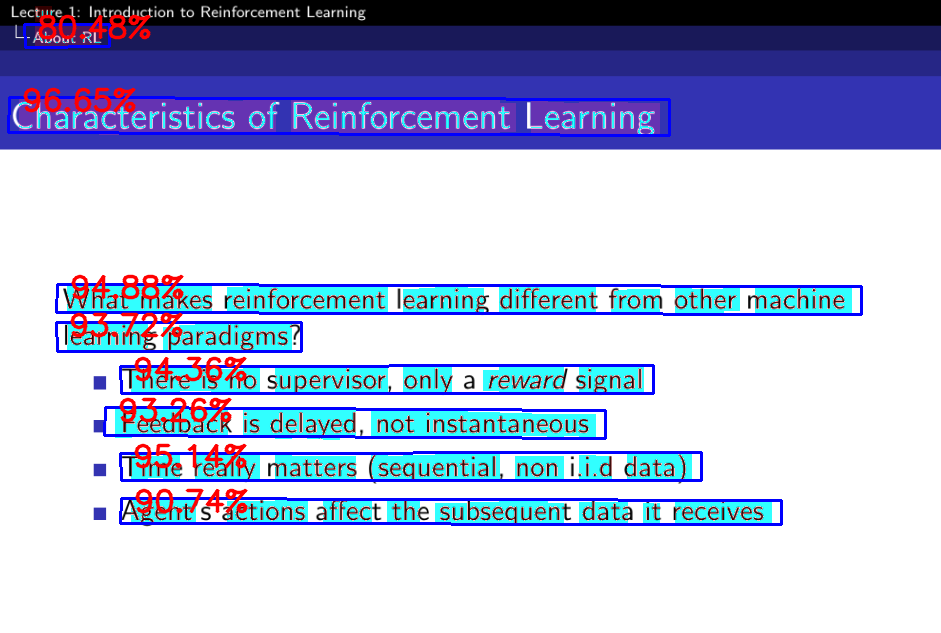




Text recognition sample:


In [14]:
filename = "/home/lucassoares/Desktop/projects/mediumPosts/ocr_productivity/output_images_with_boxes/image7.txt"
with open(filename, "r") as text:
    for line in text.readlines():
        print(line.strip("\n"))

-AboutRL
Characteristics of Reinforcement Learning
What makes reinforcement learningdifferent from other machine
learning paradigms?
There isnosupervisor,only areward signal
Feedback is delavyed,not instantaneous
Time really matters(sequential,non ii.d data)
Agent sactions affectthe subseauent datait receives


### No more copy and paste 

What I like about this approach is that in the long run you can end up with a really powerful tool to transcribe all sorts of documents, from handwritten notes to random photos with text and more. For me it was an interesting way to explore a little bit of OCR as well as set up a pipeline for quickly going through a lecture with pdf slides.

---

If you liked this post connect with me on [Twitter](https://twitter.com/LucasEnkrateia), [LinkedIn](https://www.linkedin.com/in/lucas-soares-969044167/) and follow me on [Medium](https://lucas-soares.medium.com). 
Thanks and see you next time! :)